In [19]:
from IPython.display import Image
from IPython.core.display import HTML 

# Shut the Box with Dynamic Programming

I recently played a game at a friend's house called *shut the box*.

At the beginning of the game, **tiles** numbered $1$ through $10$ (some variants go to $9$, some to $12$) are positioned in an "up" position. The player rolls two dice and adds the rolls together. The player then chooses tiles in the "up" position whose numbers add to the roll and puts them in the "down" position. The goal is to eventually put every tile down.

For example, if the tiles that are up are $1, 3, 4, 6, 7, 8$ and the player rolls a $4$ and a $3$, then they may put down the $7$ tile, the $6$ and $1$ tiles, or the $4$ and $3$ tiles. We can think of these as the player's possible "moves".

Sometimes a roll will be made where it is not possible to put down tiles that add up to the roll. In this case, the game is over. In the original game, you would add up the values on the tiles that are still in the "up" position, and this would be your score. A higher score would be worse. However, in the game we played, our goal was just to put all of the tiles down ("shut the box"). 

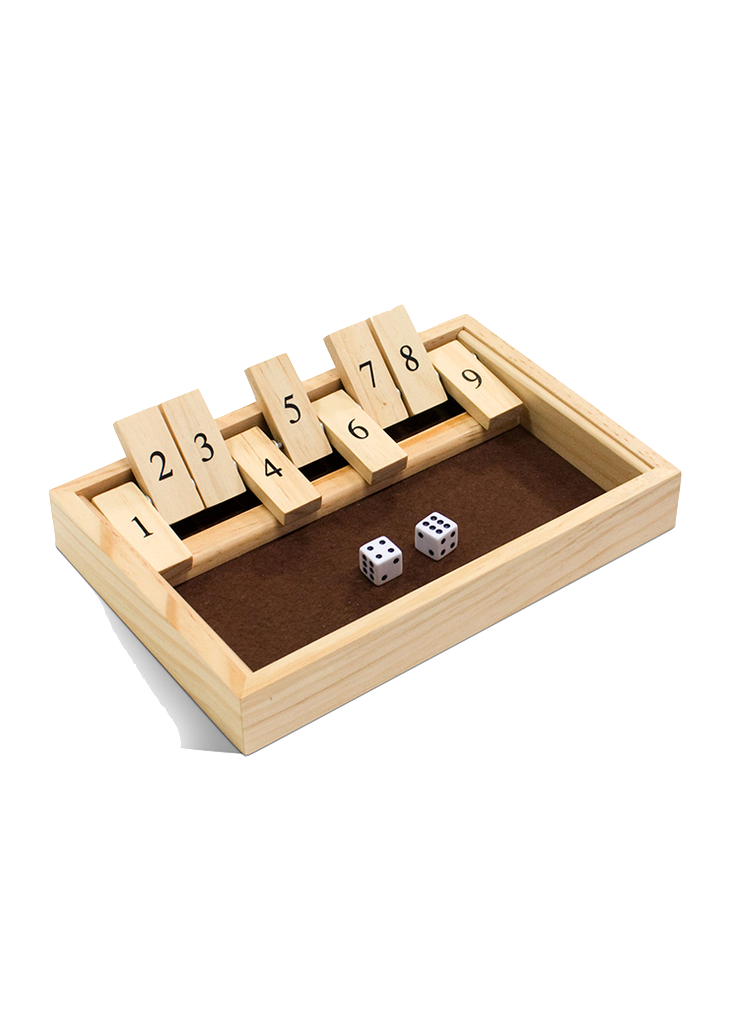

In [21]:
Image(filename = "game.png")

We passed the game around many times and we often got close, but none of us won despite trying for a long time.

Something funny happens when you take computer science. You begin to think of problems like this in terms of algorithms and mathematically optimal strategies. I told my friends that "I could probably write a Python program to play this game optimally". I realized that, given a configuration of tiles that are up and down, and given a roll total, the optimal move  is the one with the largest number of possible winning outcomes. 

Some configurations are harder to "win" than others. As a simple example, a configuration with only the $1$ tile in the up position is impossible to solve since the smallest number that can be rolled with two dice is $2$. A configuration with only the $7$ tile up is easier to solve than one with only the $3$ tile up, since more dice combinations sum to $7$ than to $3$. 

A naive approach to this problem would take the current configuration and the current roll, and iterate through each legal move. It would recursively traverse the game tree until it found a winning move, and it would count that towards the total number of winning moves from that configuration. 

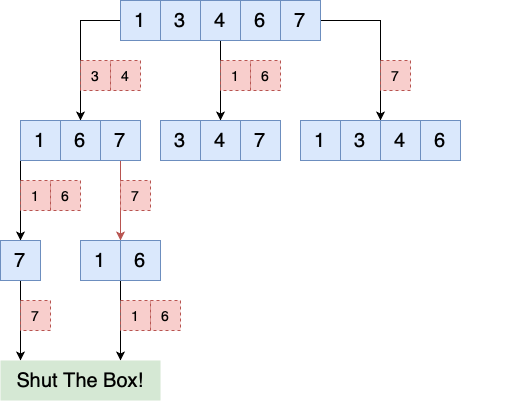

In [22]:
Image("tree.png")

This game tree is compressed. Technically there should be branches for every possible roll of dice one, every possible roll of dice two, and every possible legal move given their sum and the current configuration. The given game tree assumes an initial configuration of the $1, 3, 4, 6, 7$ tiles being up and the dice total being $7$. There are three legal moves, each of which result in a new configuration of tiles. We would count, from each of these configurations, the number of sequences of moves that could possibly lead to a win.

The straightforward way to traverse the game tree is to use recursion. For each possible move, count the number of sequences of moves beginning with this move that could lead to a win. At the bottom of the recursion tree, we encounter configurations that can be solved in a single move (such as the two moves leading to **Shut the Box!** in the game tree diagram).

This is a naive approach because we will repeatedly encounter the same configurations of tiles by arriving at them via different sequences of moves. As a result, all of the work for counting the number of winning sequences of moves from this configuration onwards will be repeated.

This is where dynamic programming comes in. We use dynamic programming when a problem can be solved by recursively solving subproblems and combining their results, and the solutions to these subproblems are used multiple times in the overall solution. The idea is to only compute the solution to each subproblem once and to store it, and then look up the solution the next time that you need to use it.

What is the best approach to using dynamic programming to solve this problem then? Whereas with recursion we start at the top of the recursion tree, in dynamic programming we start at the bottom. We ask, "for every configuration of tiles, how many ways can you solve it in a single move?". We can actually list this relatively easily by just looking at the integer partitions of the numbers $2$ through $12$ with unique elements.

The following code was provided by [Jerome Kelleher](http://jeromekelleher.net/generating-integer-partitions.html) for providing fast integer partitions:

In [1]:
def integer_partitions(n):
    """
    Generates the integer partitions of n.
    Source:
    
    Returns: list of ints.
    """
    a = [0 for i in range(n + 1)]
    k = 1
    y = n - 1
    while k != 0:
        x = a[k - 1] + 1
        k -= 1
        while 2 * x <= y:
            a[k] = x
            y -= x
            k += 1
        l = k + 1
        while x <= y:
            a[k] = x
            a[l] = y
            yield a[:k + 2]
            x += 1
            y -= 1
        a[k] = x + y
        y = x + y - 1
        yield a[:k + 1]

We can filter out the partitions that contain duplicate elements quickly in python by converting the list of integers returned by this function to a `set` or `frozenset`. This has additional benefits since using the native `set` data type lets us do important fast operations, such as checking set membership in $O(1)$ time.

In [2]:
def unique_integer_partitions(n):
    for partition in integer_partitions(n):
        set_partition = frozenset(partition)
        if len(set_partition) == len(partition): # check each element is unique
            yield set_partition

In [3]:
for roll_total in range(2, 13):
    for config in unique_integer_partitions(roll_total):
        print(config)

frozenset({2})
frozenset({1, 2})
frozenset({3})
frozenset({1, 3})
frozenset({4})
frozenset({1, 4})
frozenset({2, 3})
frozenset({5})
frozenset({1, 2, 3})
frozenset({1, 5})
frozenset({2, 4})
frozenset({6})
frozenset({1, 2, 4})
frozenset({1, 6})
frozenset({2, 5})
frozenset({3, 4})
frozenset({7})
frozenset({1, 2, 5})
frozenset({1, 3, 4})
frozenset({1, 7})
frozenset({2, 6})
frozenset({3, 5})
frozenset({8})
frozenset({1, 2, 6})
frozenset({1, 3, 5})
frozenset({8, 1})
frozenset({2, 3, 4})
frozenset({2, 7})
frozenset({3, 6})
frozenset({4, 5})
frozenset({9})
frozenset({1, 2, 3, 4})
frozenset({1, 2, 7})
frozenset({1, 3, 6})
frozenset({1, 4, 5})
frozenset({1, 9})
frozenset({2, 3, 5})
frozenset({8, 2})
frozenset({3, 7})
frozenset({4, 6})
frozenset({10})
frozenset({1, 2, 3, 5})
frozenset({8, 1, 2})
frozenset({1, 3, 7})
frozenset({1, 4, 6})
frozenset({1, 10})
frozenset({2, 3, 6})
frozenset({2, 4, 5})
frozenset({9, 2})
frozenset({8, 3})
frozenset({4, 7})
frozenset({5, 6})
frozenset({11})
frozenset({1,

This gives us a base to work from when using dynamic programming. For the next step, we can ask "for every configuration of tiles, how many ways can you solve it in two moves?". The answer then becomes simple: how many ways can we make a move that results in a configuration that can be solved in a single move? We can simply iterate through each possible dice roll for each dice, and for each total we can iterate through each legal move. We can then tally up how many of the next configurations can be solved in a single move, and this tells us how many can be solved in two moves. The process is identical for three moves, and so on.

To make things easier, we represent configurations (`config`) as a python `frozenset` of integers representing which tiles are still in the up position. We also represent moves as a `frozenset` of integers representing which tiles to be put down. We can combine `config`s with `unique_integer_partitions` to generate legal moves given a dice roll total:

In [4]:
def gen_moves(config, n):
    for partition in unique_integer_partitions(n):
        if partition.issubset(config):
            yield partition

In [5]:
for move in gen_moves(frozenset([1,3,4,6,7]), 7):
    print(move)

frozenset({1, 6})
frozenset({3, 4})
frozenset({7})


To store our precomputed results, we will use a table. The rows of the table will correspond to each possible configuration of tiles (all $2^{10}$ of them), and the columns will represent the number of moves used to solve it. The entries in the table will correspond to the number of of ways that configuration can be solved in the given number of moves.

To generate every possible configuration of tiles, we can use the [itertools recipe for generating the power set of a set](https://docs.python.org/3/library/itertools.html#itertools-recipes):

In [6]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    subsets = chain.from_iterable(
        combinations(s, size) for size in range(len(s)+1))
    return [frozenset(subset) for subset in subsets]

In [7]:
configs = powerset(range(1, 11))

The initial game begins with all tiles in the up position. 

In [8]:
configs[-1]

frozenset({1, 2, 3, 4, 5, 6, 7, 8, 9, 10})

We can precompute the available moves for each configuration-roll pair to reduce computation costs:

In [9]:
movelist = {config:
                {roll:list(gen_moves(config, roll)) for roll in range(2, 13)} 
            for config in configs}

To create our table, we will use a `dict` of `dict`s where the first key is the configuration of tiles and the second key is the number of moves to solve that configuration. This allows us to use our `config`s as keys, and is also a format supported by `pandas` which will let us explore data easily using csv files.

In [10]:
max_moves = 12
num_moves = {config:
                 {i:0 for i in range(1, max_moves)} 
             for config in configs}

The implementation itself is relatively straightforward. For each number of moves, for each configuration of tiles, we iterate through each legal move and add the number of ways each resulting configuration can be solved. To make things even faster, rather than iterate through each roll of each dice, we can simply iterate through the roll totals ($2$ through $12$) and multiply our counts by the number of ways that total can be rolled.

In [11]:
ways_to_roll = {
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    7:6,
    8:5,
    9:4,
    10:3,
    11:2,
    12:1
}

In [12]:
for move_num in range(1, max_moves):
    for config in configs:
        for roll in range(2, 13):
            for move in movelist[config][roll]:
                config_after_move = config - move
                if move_num == 1:
                    if len(config_after_move) == 0:
                        num_moves[config][move_num] = ways_to_roll[roll]
                else:
                    num = num_moves[config_after_move][move_num-1]
                    num_moves[config][move_num] += ways_to_roll[roll]*num

We can see that the algorithm itself is very quick because it essentially involves table lookups and avoids recursively recomputing work that was already done.

Let's take a peek inside.

In [13]:
initial_config = configs[-1]
num_moves[initial_config]

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 117120,
 6: 465677280,
 7: 27229396320,
 8: 166670380800,
 9: 161989632000,
 10: 0,
 11: 0}

We can see that, for the initial configuration, the game can only be solved in $5$ to $9$ moves. There are no $4$-move solutions (or less) and are no $10$-move solutions (or more). 

But how do we use this table to actually extract the best move, given a configuration and a roll total? Given the configuration, we can iterate through each legal move and see how many ways the resulting configuration can be solved. Computing this is straightforward: we sum the ways that configuration can be solved in $1$ move, in $2$ moves, in $3$ moves, etc. to get the total number of ways it can be solved. The best move for that configuration-roll pair is the move that results in the configuration with the largest number of ways to be solved.

In [14]:
best_moves = {config:
                  {roll:None for roll in range(2, 13)} 
              for config in configs}
                        
for config in configs:
    for roll in range(2, 13):
        moves = movelist[config][roll]
        if len(moves) == 0:
            continue
        num_wins = [sum([num_moves[config - move][move_num] 
                         for move_num in range(1, max_moves)]) 
                    for move in moves]
        best_move = moves[num_wins.index(max(num_wins))]
        best_moves[config][roll] = best_move

Finally, we can test the effectiveness of using our optimal strategy by simulating the game and comparing to a strategy that uses random moves. Let us start by defining two strategies:

In [15]:
import random

In [16]:
def random_strategy(config, roll):
    moves = movelist[config][roll]
    if len(moves) == 0:
        return None
    return random.choice(moves)

def optimal_strategy(config, roll):
    return best_moves[config][roll]

Also, simulating Shut the Box if very easy to do since making moves just corresponds to subtracting moves (`frozenset`s) from the configuration until either there are no more moves (game over) or the configuration is reduced to the empty set (you win).

In [17]:
def simulate(strategy):
    """
    Simulates a game of Shut the Box.
    strategy: callable(config: frozenset, roll: int) -> move: frozenset
    returns: boolean (whether the game was won or not)
    """
    config = frozenset(range(1, 11))
    while len(config) > 0:
        roll = random.randint(1, 6) + random.randint(1, 6)
        move = strategy(config, roll)
        if move is None:
            # No winning moves. Game over.
            return False
        config = config - move
    # You won!
    return True

def evaluate(strategy, N=1000000):
    """
    Evaluates a strategy for Shut the Box.
    strategy: callable(config: frozenset, roll: int) -> move: frozenset
    N: int. Number of iterations.
    returns: float (the proportion of games that are won)
    """
    wins = 0
    for n in range(N):
        if simulate(strategy):
            wins += 1
    return wins/N

Finally, let's evaluate a random strategy versus an optimal strategy:

In [18]:
print(f'Random strategy:{100*evaluate(random_strategy):.2f}')
print(f'Optimal strategy:{100*evaluate(optimal_strategy):.2f}')

Random strategy:0.72
Optimal strategy:3.89


I can see why this is an addicting game to play, considering even the optimal strategy wins about one every 25 games. The games themselves are fast to play, taking only a few seconds to play (and microseconds to simulate). It looks like a random strategy works less than $1\%$ of the time and an optimal strategy works around $4\%$ of the time.

I hope you all enjoyed figuring this out with me! Computer science is really about thinking problems through in a logical way and applying the techniques you know to solve it. 